In [1]:
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [2]:
def grid_coords(grid):
    if grid=='SC':
        # 6 orientations following the arrangement of standard dice
        # 1/6 for +x/-x; 2/5 for +y/-y; 3/4 for +z/-z
        r_n = np.array([[1,0,0],[0,1,0],[0,0,1],[0,0,-1],[0,-1,0],[-1,0,0]])
        r_opp = np.array([5,4,3,2,1,0])
    
    if grid=='RB':
        # rhombic dodecahedron
        r_n = np.array([[0,1,1],[0,-1,-1],[0,1,-1],[0,-1,1],
                        [1,0,1],[-1,0,-1],[1,0,-1],[-1,0,1],
                        [1,1,0],[-1,-1,0],[1,-1,0],[-1,1,0]])/np.sqrt(2)
        r_opp = np.array([1,0,3,2,
                          5,4,7,6,
                          9,8,11,10])
        
    if grid=='RT':
        phi = (1+np.sqrt(5))/2
        # rhombic triacontahedron
        r_n = np.array([
                       [phi,0,0],[0,phi,0],[0,0,phi],
                       [-phi,0,0],[0,-phi,0],[0,0,-phi],
                       [1/2,phi/2,phi**2/2],[phi**2/2,1/2,phi/2],[phi/2,phi**2/2,1/2],
                       [-1/2,phi/2,phi**2/2],[-phi**2/2,1/2,phi/2],[-phi/2,phi**2/2,1/2],
                       [1/2,-phi/2,phi**2/2],[phi**2/2,-1/2,phi/2],[phi/2,-phi**2/2,1/2],
                       [1/2,phi/2,-phi**2/2],[phi**2/2,1/2,-phi/2],[phi/2,phi**2/2,-1/2],
                       [-1/2,-phi/2,phi**2/2],[-phi**2/2,-1/2,phi/2],[-phi/2,-phi**2/2,1/2],
                       [1/2,-phi/2,-phi**2/2],[phi**2/2,-1/2,-phi/2],[phi/2,-phi**2/2,-1/2],
                       [-1/2,phi/2,-phi**2/2],[-phi**2/2,1/2,-phi/2],[-phi/2,phi**2/2,-1/2],
                       [-1/2,-phi/2,-phi**2/2],[-phi**2/2,-1/2,-phi/2],[-phi/2,-phi**2/2,-1/2]
                       ])
        r_n = np.array([points/np.sqrt(np.sum(points**2)) for points in r_n])
        r_opp = np.array([3,4,5,
                          0,1,2,
                          27,28,29,
                          21,22,23,
                          24,25,26,
                          18,19,20,
                          15,16,17,
                          9,10,11,
                          12,13,14,
                          6,7,8])
        
    if grid=='TH':
        # tetrahedron
        r_n = np.array([1,1,1],[-1,1,1],[1,-1,1],[1,1,-1])
        r_n = np.array([points/np.sqrt(np.sum(points**2)) for points in r_n])
        r_opp = np.array([])
    return r_n, r_opp

## RT

In [3]:
# first rhombus
phi = (1 + np.sqrt(5)) / 2
vertices_0 = [[1,1,1], [1,phi,0], [0,phi,1/phi], [0,1,phi]]

# mirror symmetry
vertices_mirror = []
for sign_x in [-1,1]:
    for sign_y in [-1,1]:
        for sign_z in [-1,1]:
            sgn = [sign_x, sign_y, sign_z]
            vertices_sym = [[sgn[i]*v[i] for i in range(3)] for v in vertices_0]
            vertices_mirror.append(vertices_sym)
vertices_mirror.append([[1,phi,0], [0,phi,1/phi], [-1,phi,0], [0,phi,-1/phi]])
vertices_mirror.append([[1,-phi,0], [0,-phi,1/phi], [-1,-phi,0], [0,-phi,-1/phi]])

# 3fold symmetry
idx_permute = [[1,0,2],[0,2,1],[2,1,0]]
vertices_all = []
for idx in idx_permute:
    vertices_sym = [[[v[idx[i]] for i in range(3)] for v in vertices_plane] for vertices_plane in vertices_mirror]
    vertices_all.extend(vertices_sym)

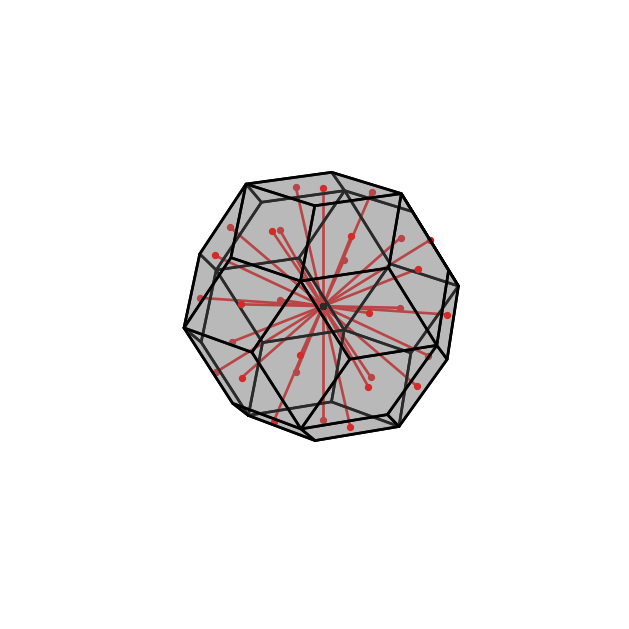

In [4]:
r_n, r_opp = grid_coords('RT')
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(4, 4)
fig.set_dpi(192)

for vertices in np.array(vertices_all):
    # Plotting the vertices
    # ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='r')

    # Plotting the faces
    poly3d = [[vertices[vertice_idx]/phi for vertice_idx in [0,1,2,3,0]]]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='gray', linewidths=1, edgecolors='black', alpha=.33))

for r in r_n:
    ax.scatter(0,0,0, color='k',s=2)
    ax.plot([0, r[0]], [0, r[1]], [0, r[2]], color='r',lw=1)
    ax.scatter(r[0], r[1], r[2], color='r',s=3)

# Set plot display parameters
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
ax.set_zlim([-1.4, 1.4])
ax.set_box_aspect([1, 1, 1])
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove background
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Remove grid lines
ax.grid(False)
ax.view_init(22.5, -80)
ax.set_axis_off()

plt.show()

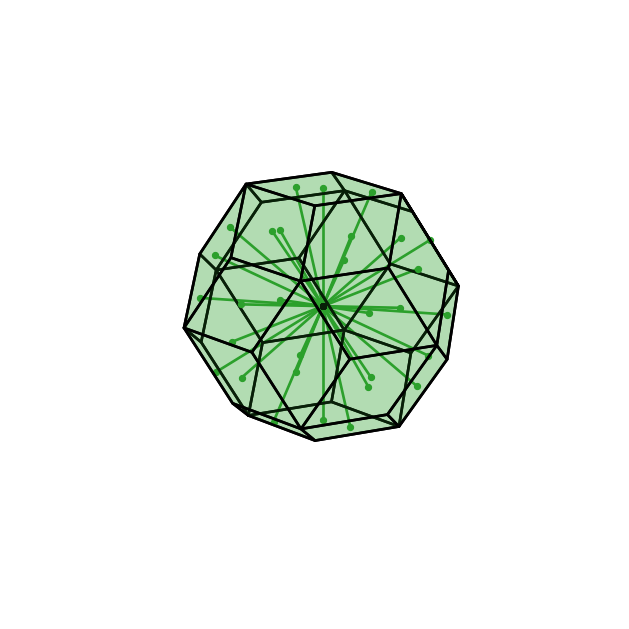

In [5]:
r_n, r_opp = grid_coords('RT')
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(4, 4)
fig.set_dpi(192)

for vertices in np.array(vertices_all):
    # Plotting the vertices
    # ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='r')

    # Plotting the faces
    poly3d = [[vertices[vertice_idx]/phi for vertice_idx in [0,1,2,3,0]]]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='C2', linewidths=1, edgecolors='black', alpha=.2))

for r in r_n:
    ax.scatter(0,0,0, color='k',s=2)
    ax.plot([0, r[0]], [0, r[1]], [0, r[2]], color='C2',lw=1)
    ax.scatter(r[0], r[1], r[2], color='C2',s=3)

# Set plot display parameters
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
ax.set_zlim([-1.4, 1.4])
ax.set_box_aspect([1, 1, 1])
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove background
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Remove grid lines
ax.grid(False)
ax.view_init(22.5, -80)
ax.set_axis_off()

plt.show()

## RD

In [6]:
# first rhombus
phi = (1 + np.sqrt(5)) / 2
sq2 = np.sqrt(2)
vertices_0 = [[1,1,1], [0,0,2], [-1,1,1], [0,2,0]]

# mirror symmetry
vertices_mirror = []
for sign_x in [1]:
    for sign_y in [-1,1]:
        for sign_z in [-1,1]:
            sgn = [sign_x, sign_y, sign_z]
            vertices_sym = [[sgn[i]*v[i] for i in range(3)] for v in vertices_0]
            vertices_mirror.append(vertices_sym)

# 3fold symmetry
idx_permute = [[0,1,2],[1,2,0],[2,0,1]]
vertices_all = []
for idx in idx_permute:
    vertices_sym = [[[v[idx[i]] for i in range(3)] for v in vertices_plane] for vertices_plane in vertices_mirror]
    vertices_all.extend(vertices_sym)

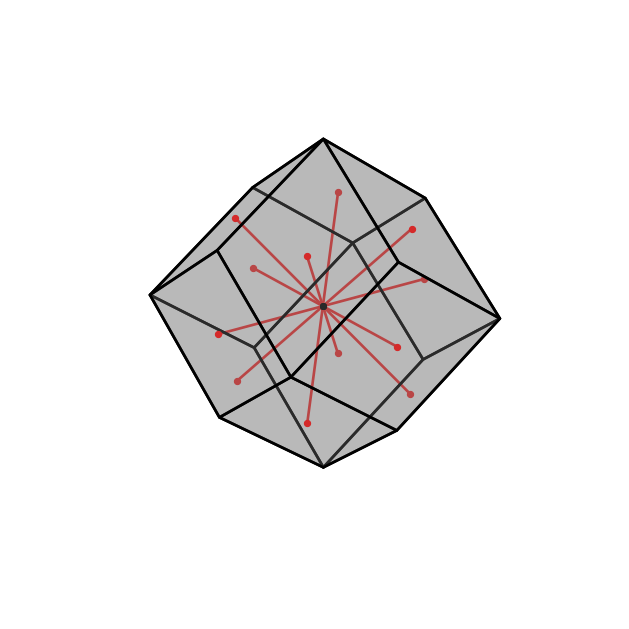

In [7]:
r_n, r_opp = grid_coords('RB')
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(4, 4)
fig.set_dpi(192)

for vertices in np.array(vertices_all):
    # Plotting the vertices
    # ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='r')

    # Plotting the faces
    poly3d = [[vertices[vertice_idx]/sq2 for vertice_idx in [0,1,2,3,0]]]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='gray', linewidths=1, edgecolors='black', alpha=.33))

for r in r_n:
    ax.scatter(0,0,0, color='k',s=2)
    ax.plot([0, r[0]], [0, r[1]], [0, r[2]], color='r',lw=1)
    ax.scatter(r[0], r[1], r[2], color='r',s=3)

# Set plot display parameters
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
ax.set_zlim([-1.4, 1.4])
ax.set_box_aspect([1, 1, 1])
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove background
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Remove grid lines
ax.grid(False)
ax.view_init(22.5, -80)
ax.set_axis_off()

plt.show()

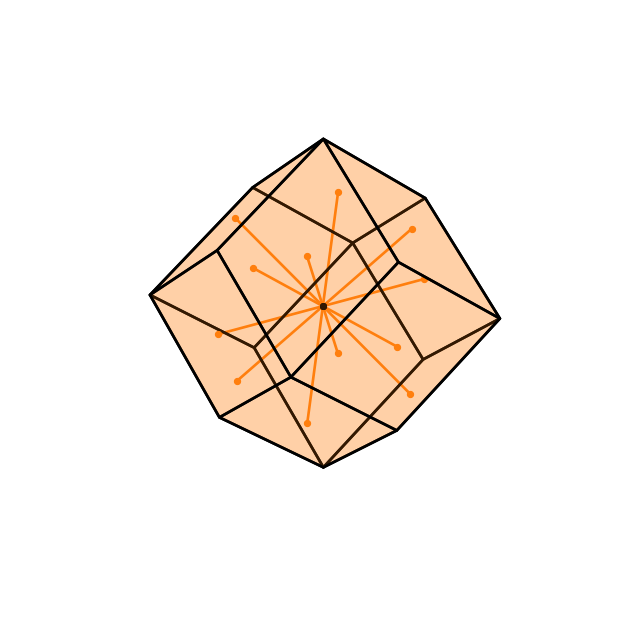

In [8]:
r_n, r_opp = grid_coords('RB')
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(4, 4)
fig.set_dpi(192)

for vertices in np.array(vertices_all):
    # Plotting the vertices
    # ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='r')

    # Plotting the faces
    poly3d = [[vertices[vertice_idx]/sq2 for vertice_idx in [0,1,2,3,0]]]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='C1', linewidths=1, edgecolors='black', alpha=.2))

for r in r_n:
    ax.scatter(0,0,0, color='k',s=2)
    ax.plot([0, r[0]], [0, r[1]], [0, r[2]], color='C1',lw=1)
    ax.scatter(r[0], r[1], r[2], color='C1',s=3)

# Set plot display parameters
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
ax.set_zlim([-1.4, 1.4])
ax.set_box_aspect([1, 1, 1])
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove background
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Remove grid lines
ax.grid(False)
ax.view_init(22.5, -80)
ax.set_axis_off()

plt.show()

## SC

In [9]:
# first rhombus
phi = (1 + np.sqrt(5)) / 2
sq2 = np.sqrt(2)
vertices_0 = [[1,1,1], [1,-1,1], [-1,-1,1], [-1,1,1]]

# mirror symmetry
vertices_mirror = []
for sign_x in [1]:
    for sign_y in [1]:
        for sign_z in [-1,1]:
            sgn = [sign_x, sign_y, sign_z]
            vertices_sym = [[sgn[i]*v[i] for i in range(3)] for v in vertices_0]
            vertices_mirror.append(vertices_sym)

# 3fold symmetry
idx_permute = [[0,1,2],[1,2,0],[2,0,1]]
vertices_all = []
for idx in idx_permute:
    vertices_sym = [[[v[idx[i]] for i in range(3)] for v in vertices_plane] for vertices_plane in vertices_mirror]
    vertices_all.extend(vertices_sym)

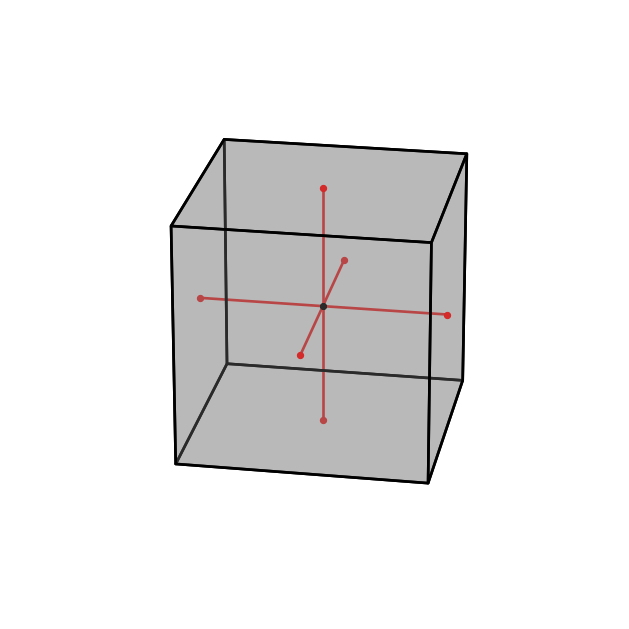

In [10]:
r_n, r_opp = grid_coords('SC')
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(4, 4)
fig.set_dpi(192)

for vertices in np.array(vertices_all):
    # Plotting the vertices
    # ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='r')

    # Plotting the faces
    poly3d = [[vertices[vertice_idx]/1 for vertice_idx in [0,1,2,3,0]]]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='gray', linewidths=1, edgecolors='black', alpha=.33))

for r in r_n:
    ax.scatter(0,0,0, color='k',s=2)
    ax.plot([0, r[0]], [0, r[1]], [0, r[2]], color='r',lw=1)
    ax.scatter(r[0], r[1], r[2], color='r',s=3)

# Set plot display parameters
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
ax.set_zlim([-1.4, 1.4])
ax.set_box_aspect([1, 1, 1])
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove background
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Remove grid lines
ax.grid(False)
ax.view_init(22.5, -80)
ax.set_axis_off()

plt.show()

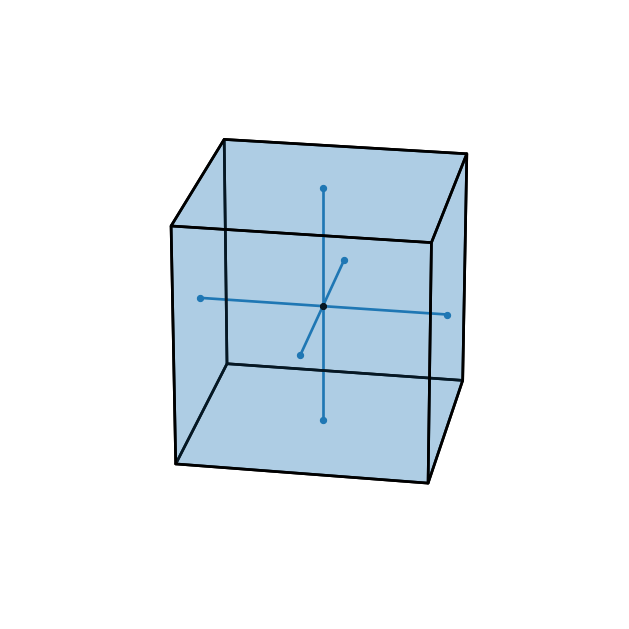

In [11]:
r_n, r_opp = grid_coords('SC')
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(4, 4)
fig.set_dpi(192)

for vertices in np.array(vertices_all):
    # Plotting the vertices
    # ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='r')

    # Plotting the faces
    poly3d = [[vertices[vertice_idx]/1 for vertice_idx in [0,1,2,3,0]]]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='C0', linewidths=1, edgecolors='black', alpha=.2))

for r in r_n:
    ax.scatter(0,0,0, color='k',s=2)
    ax.plot([0, r[0]], [0, r[1]], [0, r[2]], color='C0',lw=1)
    ax.scatter(r[0], r[1], r[2], color='C0',s=3)

# Set plot display parameters
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
ax.set_zlim([-1.4, 1.4])
ax.set_box_aspect([1, 1, 1])
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove background
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Remove grid lines
ax.grid(False)
ax.view_init(22.5, -80)
ax.set_axis_off()

plt.show()